## Keras - early stopping

### Fashion MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('fashion-mnist_train.csv',delimiter=',',skip_header=1)

In [3]:
X = data[:,1:].reshape(-1,28,28,1)

y = np.zeros(shape=(len(data),10),dtype=int)
y[np.arange(len(data)),data[:,0].astype(int)] = 1

X.shape,y.shape

((60000, 28, 28, 1), (60000, 10))

In [4]:
from keras.models import Model
from keras.layers import Input, Dense, Convolution2D, Flatten, MaxPooling2D, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
input_layer = Input(shape=(28,28,1))
conv1 = Convolution2D(16, kernel_size=3,activation='relu')(input_layer)
conv2 = Convolution2D(32, kernel_size=3,activation='relu')(conv1)
pool = MaxPooling2D()(conv2)
hidden = Dense(128,activation='relu')(Flatten()(pool))
drop = Dropout(rate=0.5)(hidden)
output = Dense(10, activation='softmax')(drop)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

### Early stopping

In [6]:
history = model.fit(X,y,epochs=100,validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss')])

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 60s 1ms/step - loss: 0.1838 - acc: 0.9587 - val_loss: 0.0713 - val_acc: 0.9718
Epoch 2/100
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0659 - acc: 0.9735 - val_loss: 0.0567 - val_acc: 0.9771
Epoch 3/100
48000/48000 [==============================] - 54s 1ms/step - loss: 0.0576 - acc: 0.9772 - val_loss: 0.0521 - val_acc: 0.9796
Epoch 4/100
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0524 - acc: 0.9790 - val_loss: 0.0510 - val_acc: 0.9802
Epoch 5/100
48000/48000 [==============================] - 60s 1ms/step - loss: 0.0491 - acc: 0.9806 - val_loss: 0.0539 - val_acc: 0.9798


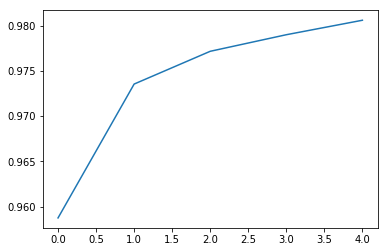

In [11]:
plt.plot(history.history['acc'])

### Save best model (checkpoint)

In [12]:
# reset model
input_layer = Input(shape=(28,28,1))
conv1 = Convolution2D(16, kernel_size=3,activation='relu')(input_layer)
conv2 = Convolution2D(32, kernel_size=3,activation='relu')(conv1)
pool = MaxPooling2D()(conv2)
hidden = Dense(128,activation='relu')(Flatten()(pool))
drop = Dropout(rate=0.5)(hidden)
output = Dense(10, activation='softmax')(drop)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(X,y,epochs=100,validation_split=0.2, callbacks=[
    EarlyStopping(monitor='val_loss',patience=5),
    ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True)
])

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 62s 1ms/step - loss: 0.2563 - acc: 0.9551 - val_loss: 0.0623 - val_acc: 0.9750

Epoch 00001: val_loss improved from inf to 0.06233, saving model to best_model.h5
Epoch 2/100
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0660 - acc: 0.9736 - val_loss: 0.0580 - val_acc: 0.9770

Epoch 00002: val_loss improved from 0.06233 to 0.05795, saving model to best_model.h5
Epoch 3/100
48000/48000 [==============================] - 57s 1ms/step - loss: 0.0580 - acc: 0.9766 - val_loss: 0.0542 - val_acc: 0.9784

Epoch 00003: val_loss improved from 0.05795 to 0.05419, saving model to best_model.h5
Epoch 4/100
48000/48000 [==============================] - 64s 1ms/step - loss: 0.0526 - acc: 0.9788 - val_loss: 0.0526 - val_acc: 0.9791

Epoch 00004: val_loss improved from 0.05419 to 0.05265, saving model to best_model.h5
Epoch 5/100
48000/48000 [=============================